<a href="https://colab.research.google.com/github/ganeshhep/JETS/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installations

In [1]:
!pip install uproot
!pip install fastjet
!pip install vector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.8/350.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 787.9/787.9 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 707.9/707.9 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.7/173.7 kB 14.5 MB/s eta 0:00:00


## Imports

In [37]:
import itertools
import uproot
from fastjet import PseudoJet, JetDefinition, ClusterSequence, antikt_algorithm, sorted_by_pt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Loading the data
from google.colab import drive
drive.mount('/content/drive')
data_file = "/content/drive/MyDrive/tutorial5.root"

Mounted at /content/drive


In [38]:
tree = uproot.open(data_file)['tree']

In [39]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
n                    | int32_t                  | AsDtype('>i4')
charge               | double                   | AsDtype('>f8')
is_charged           | int8_t                   | AsDtype('int8')
is_neutral           | int8_t                   | AsDtype('int8')
isbHadron            | int8_t                   | AsDtype('int8')
px                   | double                   | AsDtype('>f8')
py                   | double                   | AsDtype('>f8')
pz                   | double                   | AsDtype('>f8')
e                    | double                   | AsDtype('>f8')


In [40]:
tree.num_entries # This is the sum total of number of all the particles obtained at the final state of all the events.

3908853

In [41]:
table = tree.arrays(library = 'ak') # a list of dictionaries

In [45]:
def f(R) : # R is the radius parameter
  n_jets = [] # a list containing number of jets in each event
  n_bjets = [] # a list containing number of b-jets in each event
  jet_pT = [] # a list containing jets pT
  jet_eta = [] # a list containing jets eta
  w_jet_inv_mass = [] # a list containing invariant masses of w-jets

  l_event = 0

  k = 0

  N = 500 # number of events

  for n in range(N) : # taking upto 500 events
      event_n = table[table['n'] == n + 1]

      particles = [] # a list of particles in an event
      jet_list = [] # a list of jets in an event
      b_jets_list = [] # a list of b-jets in an event

      for i in range(len(event_n)) : # looping over the particles in an event
        part_p4 = PseudoJet(event_n[i]['px'], event_n[i]['py'], event_n[i]['pz'], event_n[i]['e'])
        part_p4.set_user_index(l_event + i) # labeling the particle by it's index in the 'table' array
        particles.append(part_p4)

      l_event += len(event_n)

      # Applying clustering of particles with anti-kt algorithm
      cluster = ClusterSequence(particles, JetDefinition(antikt_algorithm, R))
      jet_set = sorted_by_pt(cluster.inclusive_jets()) # Jets obtained from inclusive form of clustering algorithm and sorted by pT (decreasing pT)

      for i in range(len(jet_set)) : # looping over jets
          jet_p4 = jet_set[i]
          jet_p4.set_user_index(i + 1) # labeling each jet, 1st jet by'1', 2nd jet by '2', 3rd jet by '3' and so on and so forth
          jet_list.append(jet_p4)
          jet_pT.append(jet_p4.pt())
          jet_eta.append(jet_p4.eta())

          const_jet = cluster.constituents(jet_set[i]) # constituents of a jet

          # Identifying b-jet
          for j in range(len(const_jet)) :
            if table[const_jet[j].user_index()]['isbHadron'] == 1 :
              k += 1
              b_jets_list.append(jet_p4)
              break

      # Identifying w-jet
      jet_pair = itertools.combinations(jet_list, r = 2)

      for pair in jet_pair :
         double_jet = pair[0] + pair[1]
         if double_jet.m() > 70 and double_jet.m() < 90 :
          indx = int(str(pair[0].user_index()) + str(pair[1].user_index()))
          double_jet.set_user_index(indx)
          w_jet_inv_mass.append(double_jet.m())

      n_jets.append(len(jet_set))
      n_bjets.append(k)

  plt.hist(n_jets, bins = np.arange(1, 101), label = 'R = ' + str(R), color = 'blue', histtype = 'step', linewidth = 2.)
  plt.xlabel("Number of jets")
  plt.ylabel("Number of events")
  plt.legend()
  plt.show()

  plt.hist(n_bjets, bins = np.arange(1, 101), label = 'R = ' + str(R), color = 'blue', histtype = 'step', linewidth = 2.)
  plt.xlabel("Number of bjets")
  plt.ylabel("Number of events")
  plt.legend()
  plt.show()

  plt.hist(jet_pT, bins = np.arange(1, 101), label = 'R = ' + str(R), color = 'blue', histtype = 'step', linewidth = 2.)
  plt.xlabel("Jets transverse momentum in GeV")
  plt.ylabel("Number of jets")
  plt.legend()
  plt.show()

  plt.hist(jet_eta, bins = np.arange(1, 101), label = 'R = ' + str(R), color = 'blue', histtype = 'step', linewidth = 2.)
  plt.xlabel("Jet eta")
  plt.ylabel("Number of jets")
  plt.legend()
  plt.show()

  plt.hist(w_jet_inv_mass, bins = np.arange(1, 101), label = 'R = ' + str(R), color = 'blue', histtype = 'step', linewidth = 2.)
  plt.xlabel("invariant mass of w-jets")
  plt.ylabel("Number of w-jets")
  plt.legend()
  plt.show()

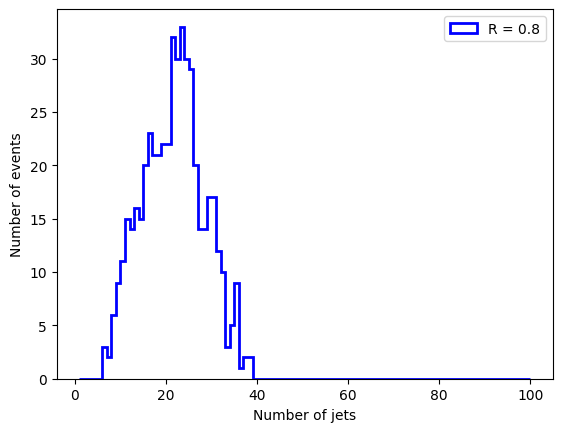

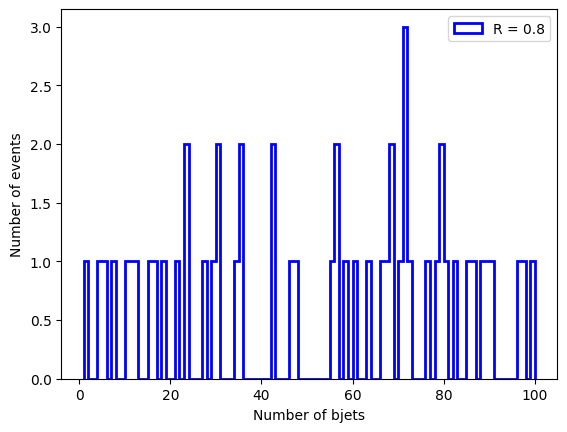

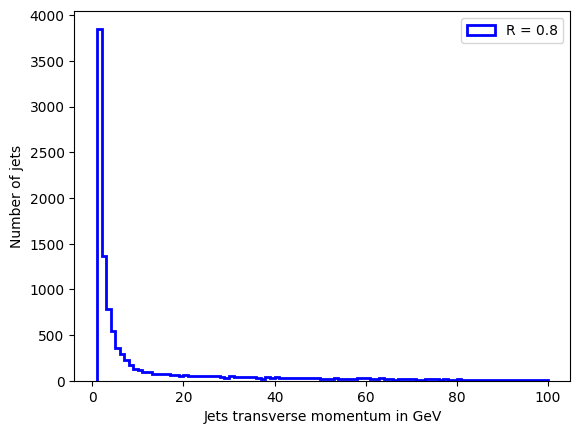

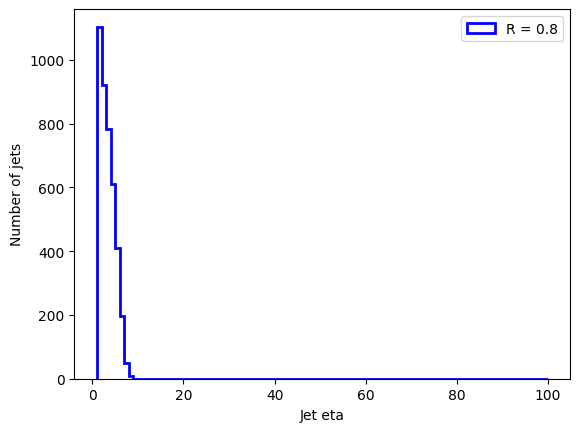

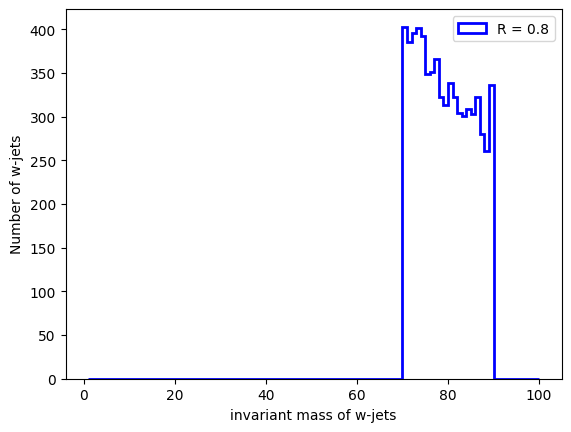

In [43]:
f(0.8)

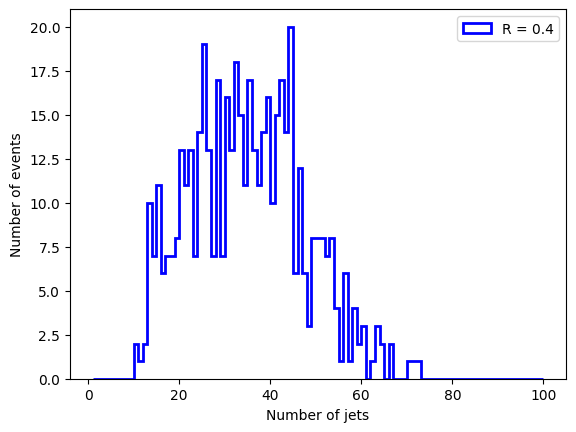

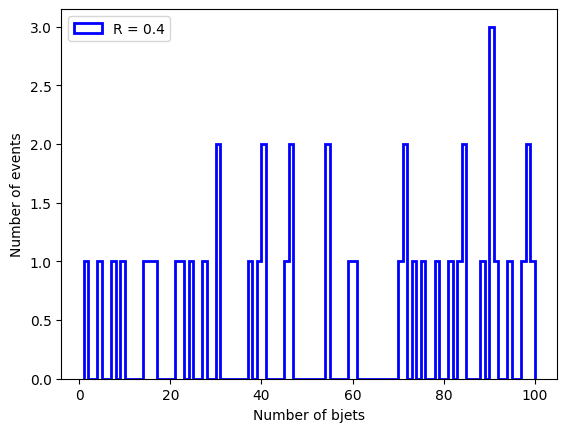

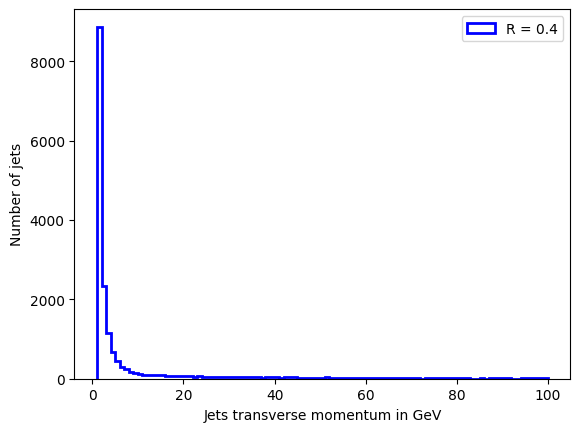

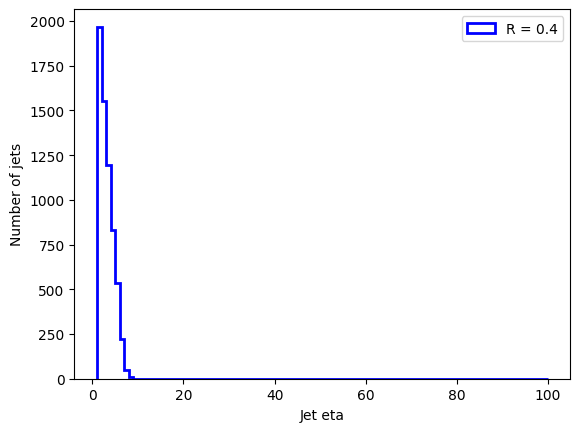

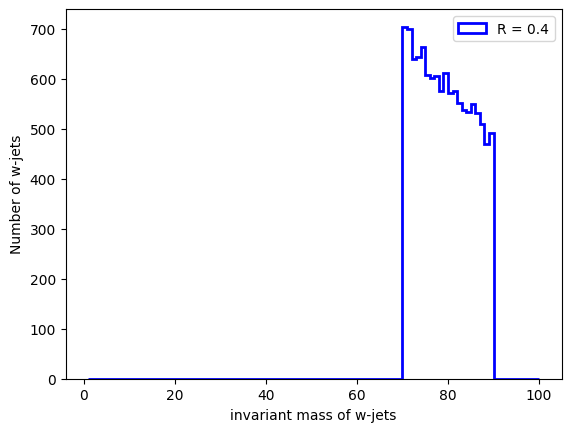

In [44]:
f(0.4)